In [ ]:
# importing of modules for CIFAR-10 CNN
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [ ]:
#training constants
BATCH_SIZE = 128
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

print('Main variables initialised.')

Main variables initialised.


In [ ]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


In [ ]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

Sample input image: [[[0.20784314 0.25490198 0.20784314]
  [0.21176471 0.24705882 0.20392157]
  [0.21960784 0.23529412 0.19607843]
  ...
  [0.18431373 0.2        0.19607843]
  [0.16078432 0.1764706  0.17254902]
  [0.09411765 0.10980392 0.10588235]]

 [[0.18039216 0.23137255 0.16078432]
  [0.20784314 0.24313726 0.1764706 ]
  [0.21176471 0.23137255 0.17254902]
  ...
  [0.16470589 0.18039216 0.1764706 ]
  [0.15294118 0.16862746 0.16470589]
  [0.10980392 0.1254902  0.12156863]]

 [[0.1764706  0.23137255 0.14901961]
  [0.19607843 0.23529412 0.16078432]
  [0.18039216 0.20392157 0.13333334]
  ...
  [0.14901961 0.16470589 0.16078432]
  [0.14117648 0.15686275 0.15294118]
  [0.11372549 0.12941177 0.1254902 ]]

 ...

 [[0.2784314  0.3254902  0.25882354]
  [0.2901961  0.3254902  0.25882354]
  [0.3137255  0.33333334 0.2627451 ]
  ...
  [0.2        0.21176471 0.12941177]
  [0.18039216 0.19215687 0.13333334]
  [0.19215687 0.19607843 0.16078432]]

 [[0.29411766 0.32156864 0.2627451 ]
  [0.30980393 0.3

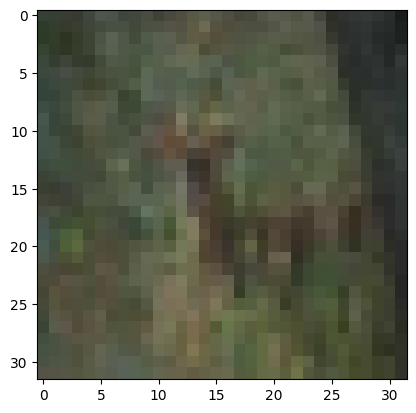

Sample input image: [[[0.8352941  0.8980392  0.9490196 ]
  [0.827451   0.8901961  0.9411765 ]
  [0.827451   0.8901961  0.9411765 ]
  ...
  [0.5921569  0.68235296 0.80784315]
  [0.5921569  0.68235296 0.80784315]
  [0.58431375 0.6745098  0.8       ]]

 [[0.8392157  0.8980392  0.94509804]
  [0.83137256 0.8901961  0.9372549 ]
  [0.83137256 0.8901961  0.9372549 ]
  ...
  [0.59607846 0.6862745  0.8117647 ]
  [0.59607846 0.6862745  0.8117647 ]
  [0.5921569  0.68235296 0.8039216 ]]

 [[0.84705883 0.8980392  0.9372549 ]
  [0.8392157  0.8901961  0.92941177]
  [0.8352941  0.8901961  0.92941177]
  ...
  [0.6        0.6901961  0.80784315]
  [0.6        0.6901961  0.80784315]
  [0.5921569  0.68235296 0.8       ]]

 ...

 [[0.5686275  0.62352943 0.64705884]
  [0.53333336 0.5803922  0.6039216 ]
  [0.56078434 0.59607846 0.61960787]
  ...
  [0.84705883 0.8509804  0.80784315]
  [0.76862746 0.77254903 0.7490196 ]
  [0.7176471  0.7176471  0.7137255 ]]

 [[0.54509807 0.6        0.62352943]
  [0.5058824  0.5

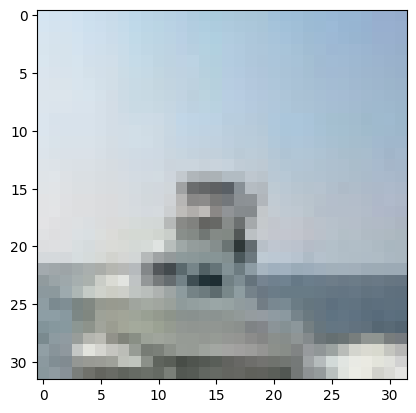

In [ ]:
# visualisation of the numerical vector and 2D colour plot of the sample CIFAR imnage 2
Selected_Image = 10
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()

Selected_Image = 100
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()





Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_125 (Conv2D)         (None, 32, 32, 96)        2688      
                                                                 
 batch_normalization_125 (B  (None, 32, 32, 96)        384       
 atchNormalization)                                              
                                                                 
 activation_200 (Activation  (None, 32, 32, 96)        0         
 )                                                               
                                                                 
 max_pooling2d_75 (MaxPooli  (None, 10, 10, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_126 (Conv2D)         (None, 10, 10, 256)       221440    
                                                     

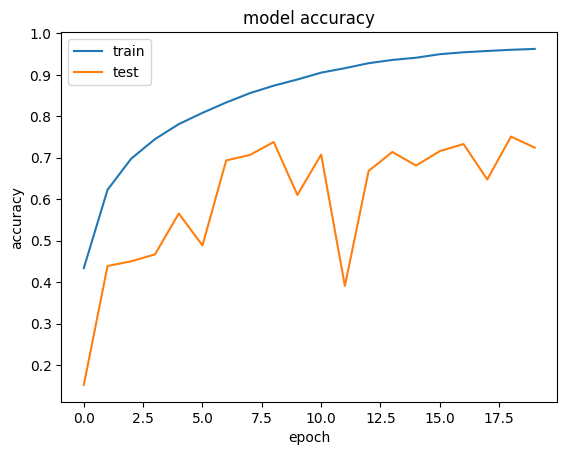

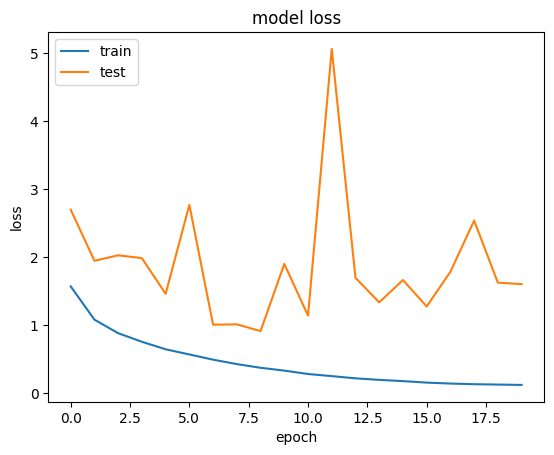

In [ ]:
# network definition
N_EPOCH = 20 # use 20 for best initial results

model = Sequential()

# first layer
model.add(Conv2D(96, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# second layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))


# third layer
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# forth layer
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# fifth layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()


history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_130 (Conv2D)         (None, 32, 32, 96)        34944     
                                                                 
 batch_normalization_130 (B  (None, 32, 32, 96)        384       
 atchNormalization)                                              
                                                                 
 activation_208 (Activation  (None, 32, 32, 96)        0         
 )                                                               
                                                                 
 max_pooling2d_78 (MaxPooli  (None, 10, 10, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_131 (Conv2D)         (None, 10, 10, 256)       221440    
                                                     

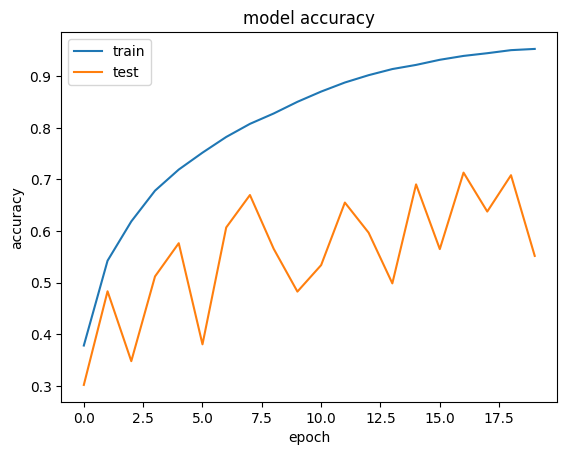

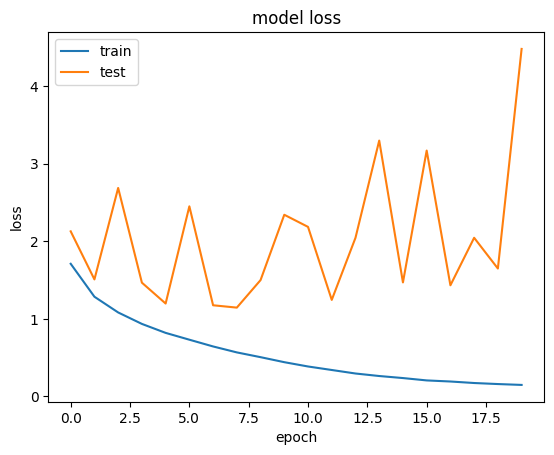

In [ ]:
# network definition
N_EPOCH = 20 # use 20 for best initial results

model = Sequential()

# first layer
model.add(Conv2D(96, (11, 11), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# second layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))


# third layer
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# forth layer
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# fifth layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()


history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_135 (Conv2D)         (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_135 (B  (None, 32, 32, 128)       512       
 atchNormalization)                                              
                                                                 
 activation_216 (Activation  (None, 32, 32, 128)       0         
 )                                                               
                                                                 
 max_pooling2d_81 (MaxPooli  (None, 10, 10, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_136 (Conv2D)         (None, 10, 10, 256)       819456    
                                                     

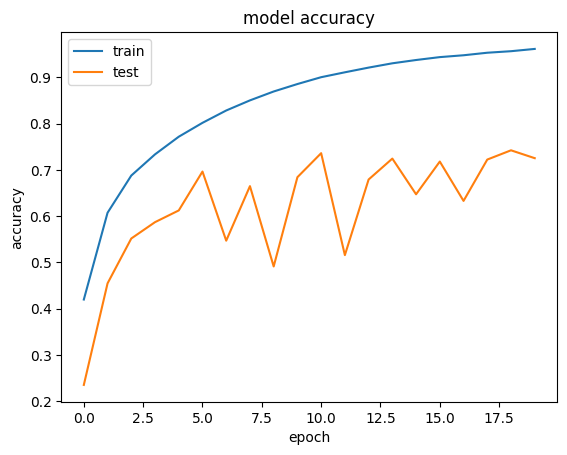

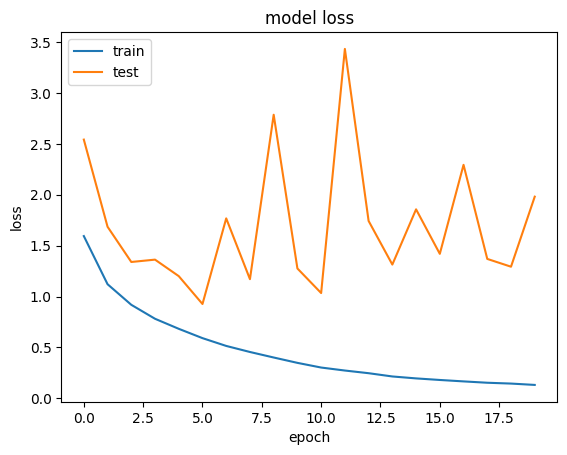

In [ ]:
# network definition
N_EPOCH = 20 # use 20 for best initial results

model = Sequential()

# first layer
model.add(Conv2D(128, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# second layer
model.add(Conv2D(256, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))


# third layer
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# forth layer
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# fifth layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()


history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_152 (Conv2D)         (None, 32, 32, 96)        2688      
                                                                 
 batch_normalization_152 (B  (None, 32, 32, 96)        384       
 atchNormalization)                                              
                                                                 
 activation_236 (Activation  (None, 32, 32, 96)        0         
 )                                                               
                                                                 
 max_pooling2d_92 (MaxPooli  (None, 10, 10, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_153 (Conv2D)         (None, 10, 10, 256)       221440    
                                                     

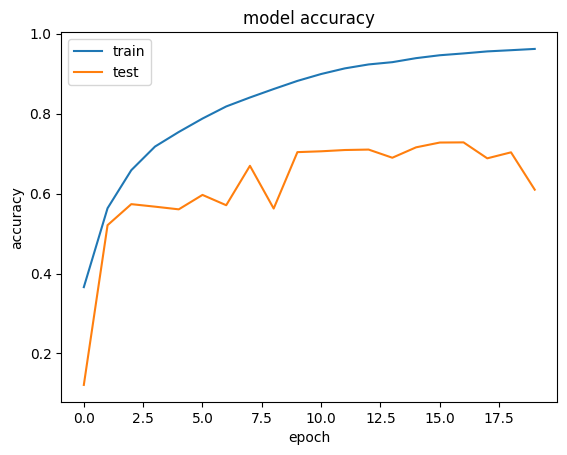

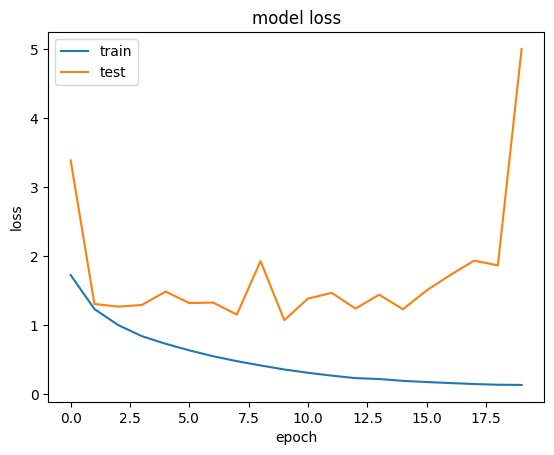

In [ ]:
# network definition
N_EPOCH = 20 # use 20 for best initial results

model = Sequential()

# first layer
model.add(Conv2D(96, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# second layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))


# third layer
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# forth layer
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()


history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_105 (Conv2D)         (None, 32, 32, 96)        2688      
                                                                 
 batch_normalization_105 (B  (None, 32, 32, 96)        384       
 atchNormalization)                                              
                                                                 
 activation_168 (Activation  (None, 32, 32, 96)        0         
 )                                                               
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 10, 10, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_106 (Conv2D)         (None, 10, 10, 256)       221440    
                                                     

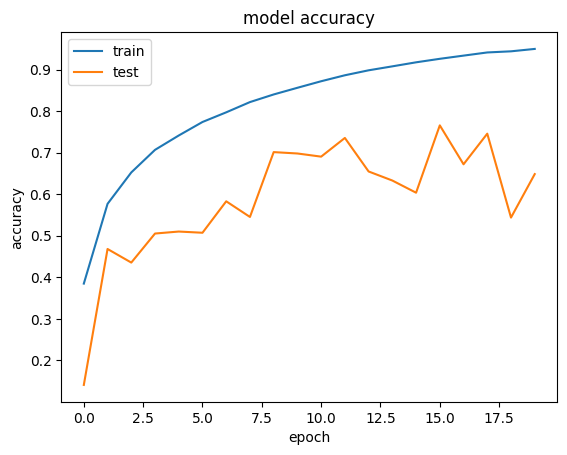

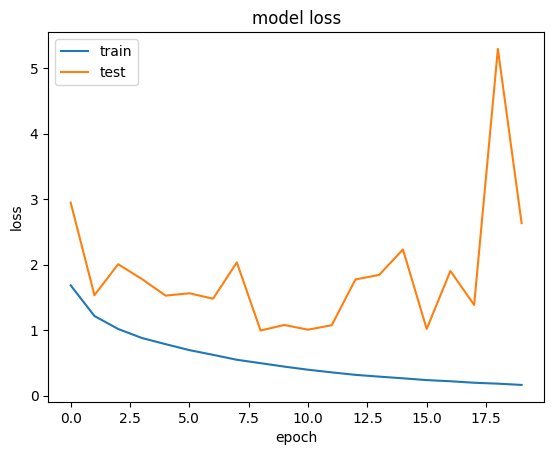

In [ ]:
# network definition
N_EPOCH = 20 # use 20 for best initial results

model = Sequential()

# first layer
model.add(Conv2D(96, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# second layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))


# third layer
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# forth layer
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# fifth layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()


history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()